In [ ]:
#importing Libraries
import pandas as pd #Used for reading data
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #Used Data Visualization
%matplotlib inline #Used Visualization

C:\Users\PC\anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
#Reading the data into working Directory
data =  pd.read_csv('oasis_longitudinal.csv')

In [ ]:
#Displaying the First 15 rows
data.head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

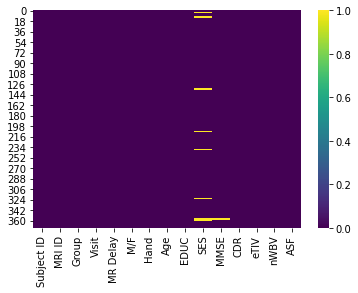

<Figure size 576x432 with 0 Axes>

In [ ]:
#Checking if the data is null
sns.heatmap(data.isnull(), cmap='viridis')
plt.figure(figsize=(8,6))
data.isnull().sum()

In [ ]:
#fill null value with their column mean and median
data["SES"].fillna(data["SES"].median(), inplace=True)
data["MMSE"].fillna(data["MMSE"].mean(), inplace=True)

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

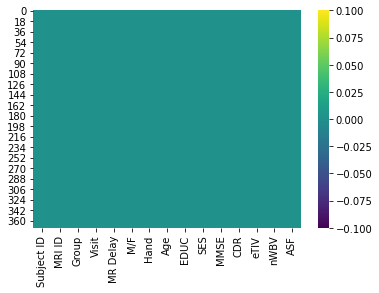

<Figure size 576x432 with 0 Axes>

In [ ]:
#Checking if the data is null
sns.heatmap(data.isnull(), cmap='viridis')
plt.figure(figsize=(8,6))
data.isnull().sum()

C:\Users\PC\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Non Demented'), Text(1, 0, 'Demented'), Text(2, 0, 'Converted')]

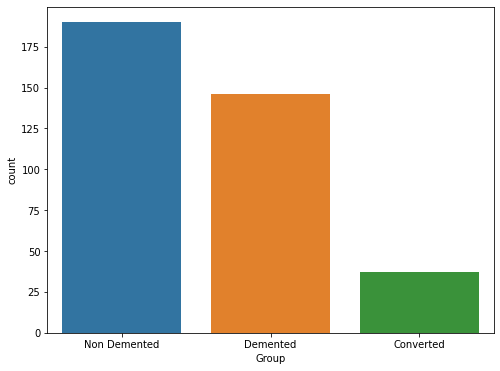

In [ ]:
#Plotting a histogram distribution
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Group'])
ax.set_xticklabels(['Non Demented', 'Demented','Converted'])

              M    F
Demented     86   60
Nondemented  61  129


Text(0.5, 1.0, 'Gender and Demented rate')

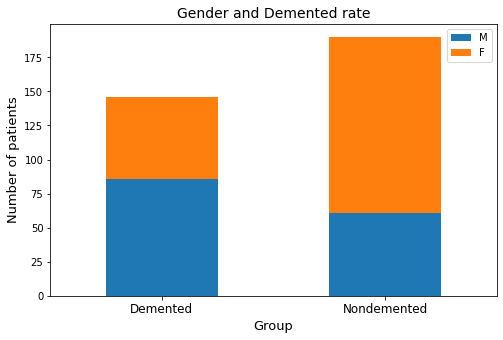

In [ ]:
#Defining Function for Barchart
def bar_chart(feature):
    Demented = data[data['Group']=='Demented'][feature].value_counts()
    Nondemented = data[data['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

(50.0, 100.0)

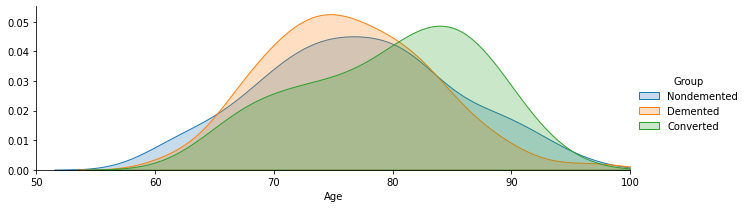

In [ ]:
#AGE vs Non-demented and demented
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(50, 100)

In [ ]:
#Importing train test split
from sklearn.model_selection import train_test_split

# HEART DATASET 

In [ ]:
#Reading data
heart_disease = pd.read_csv('Heart.csv')

In [ ]:
#Displaying the First 15 rows
heart_disease.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


C:\Users\PC\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Non Heart Disease'), Text(1, 0, 'Heart Disease')]

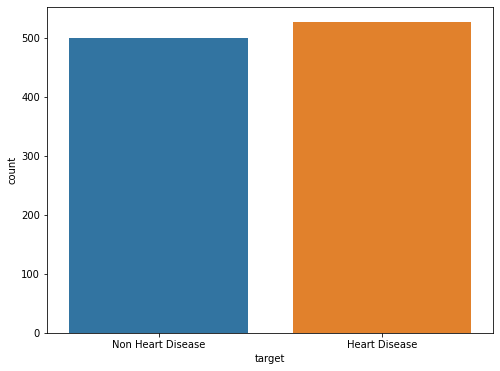

In [ ]:
#Histogram for Heart Disease and Non Heart Disease
plt.figure(figsize=(8, 6))
ax=sns.countplot(heart_disease['target'])
ax.set_xticklabels(['Non Heart Disease', 'Heart Disease'])

(50.0, 100.0)

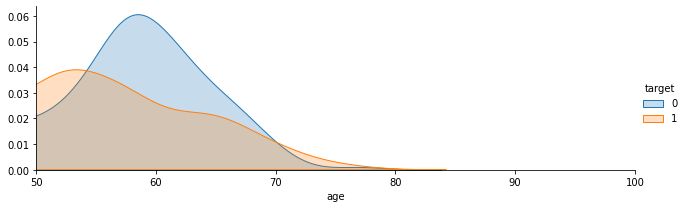

In [ ]:
#AGE vs Non-demented and Heart
facet= sns.FacetGrid(heart_disease,hue="target", aspect=3)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, heart_disease['age'].max()))
facet.add_legend()
plt.xlim(50, 100)

# RANDOM FOREST CLASSIFIER

In [ ]:
#spliting the data for target and features
X = heart_disease.drop(columns='target', axis=1)
y = heart_disease.target

In [ ]:
#Test Size 30%, 70% for Training
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creating an instance of Random Forest
rn = RandomForestClassifier(n_estimators=100)

In [ ]:
#Training the random forest model
rn.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#Predicting on the test dat
pred = rn.predict(x_test)

In [ ]:

#importing classification report to evaluate the performance of the model

from sklearn.metrics import classification_report

In [ ]:
#This display the result of the Random Forest model on the test data. The evaluation was done in terms of accuracy and precision, support and f1-score
#Here the Random Forest model obtained an accuracy result of 99%.
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.98      0.99       161

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



# Logistic Regression

In [ ]:
#Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creating an Instance of the Logistic Regression Model
lr = LogisticRegression()

In [ ]:
#Model training using the training data
lr.fit(x_train,y_train)

C:\Users\PC\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Using the Logistic Regression Model to predict on the test data, and assigning the predicted result to the variable called pred1
pred1 = lr.predict(x_test)

In [ ]:
#Evaluating the performance of the logistic regression model on the test data. The evaluation is done in terms of accuracy, precision, support and F1-score
#Here the logistic regression model obtained an accuracy result of 86%.
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       147
           1       0.84      0.91      0.87       161

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308

